# MG 2장
## Introduction to Machine Learning with Python
<img src = "http://www.hanbit.co.kr/data/books/B6119391002_l.jpg", width="200">
#### 다루는 내용
- 의사결정나무

### 의사결정 나무 (결정트리)
- 분류와 회귀에서 널리 사용된다

In [2]:
%matplotlib inline
from preamble import *

In [3]:
!pip install graphviz
import graphviz

/Users/hjkim/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


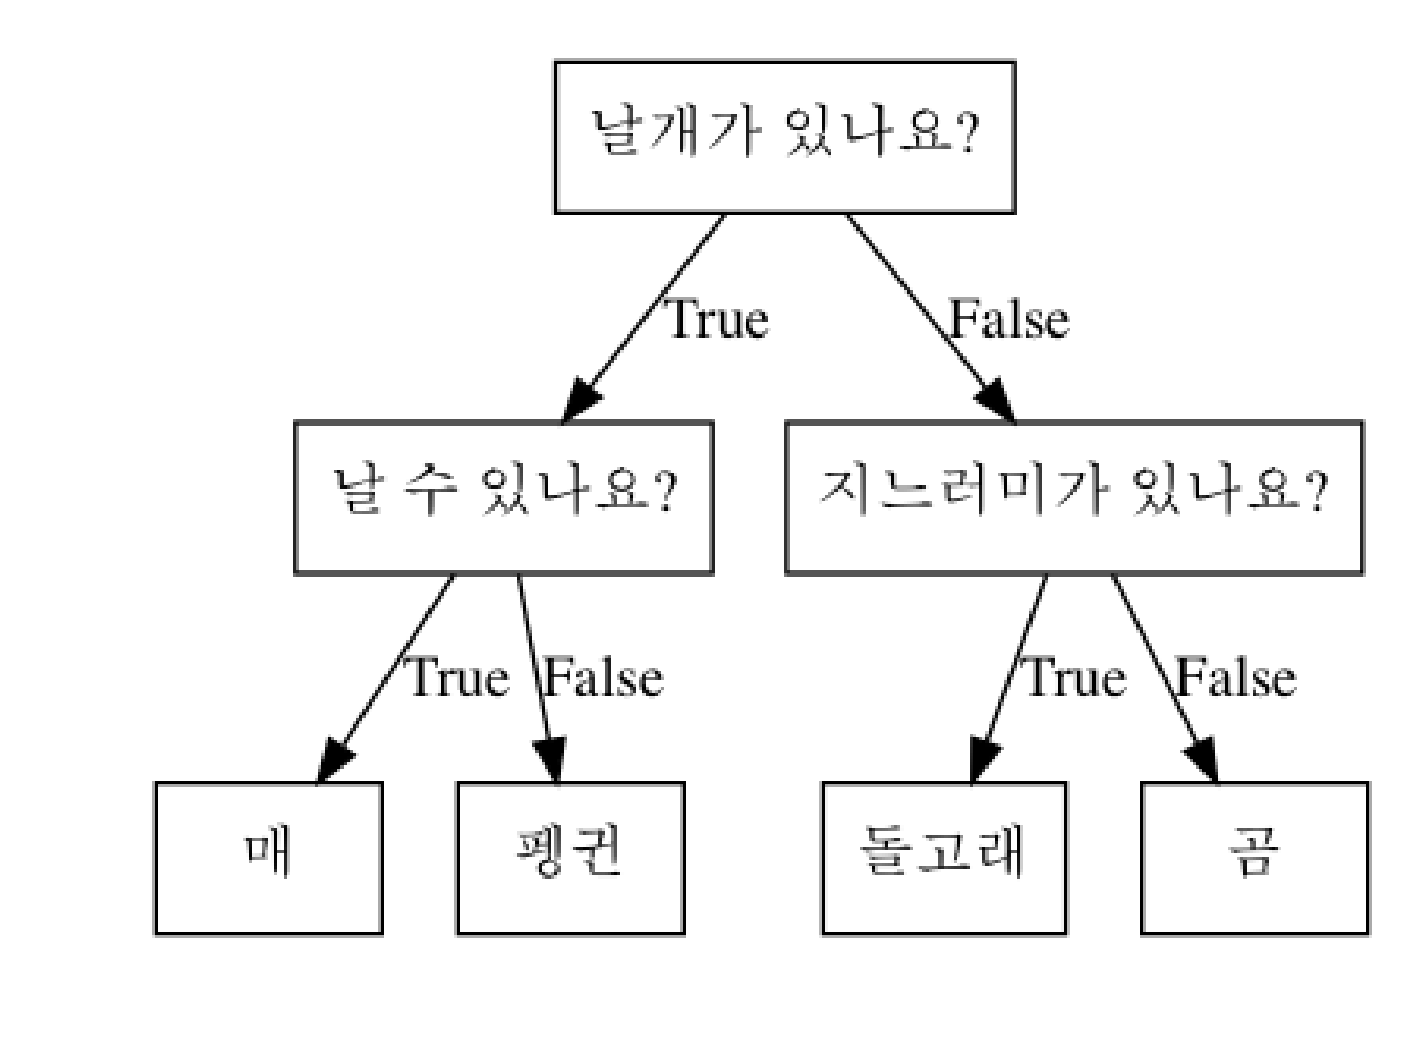

In [4]:
mglearn.plots.plot_animal_tree()

### 결정 트리 만들기

- 아래는 two_moon 데이터에 대해서 결정트리를 만드는 과정을 보여준다

/Users/hjkim/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


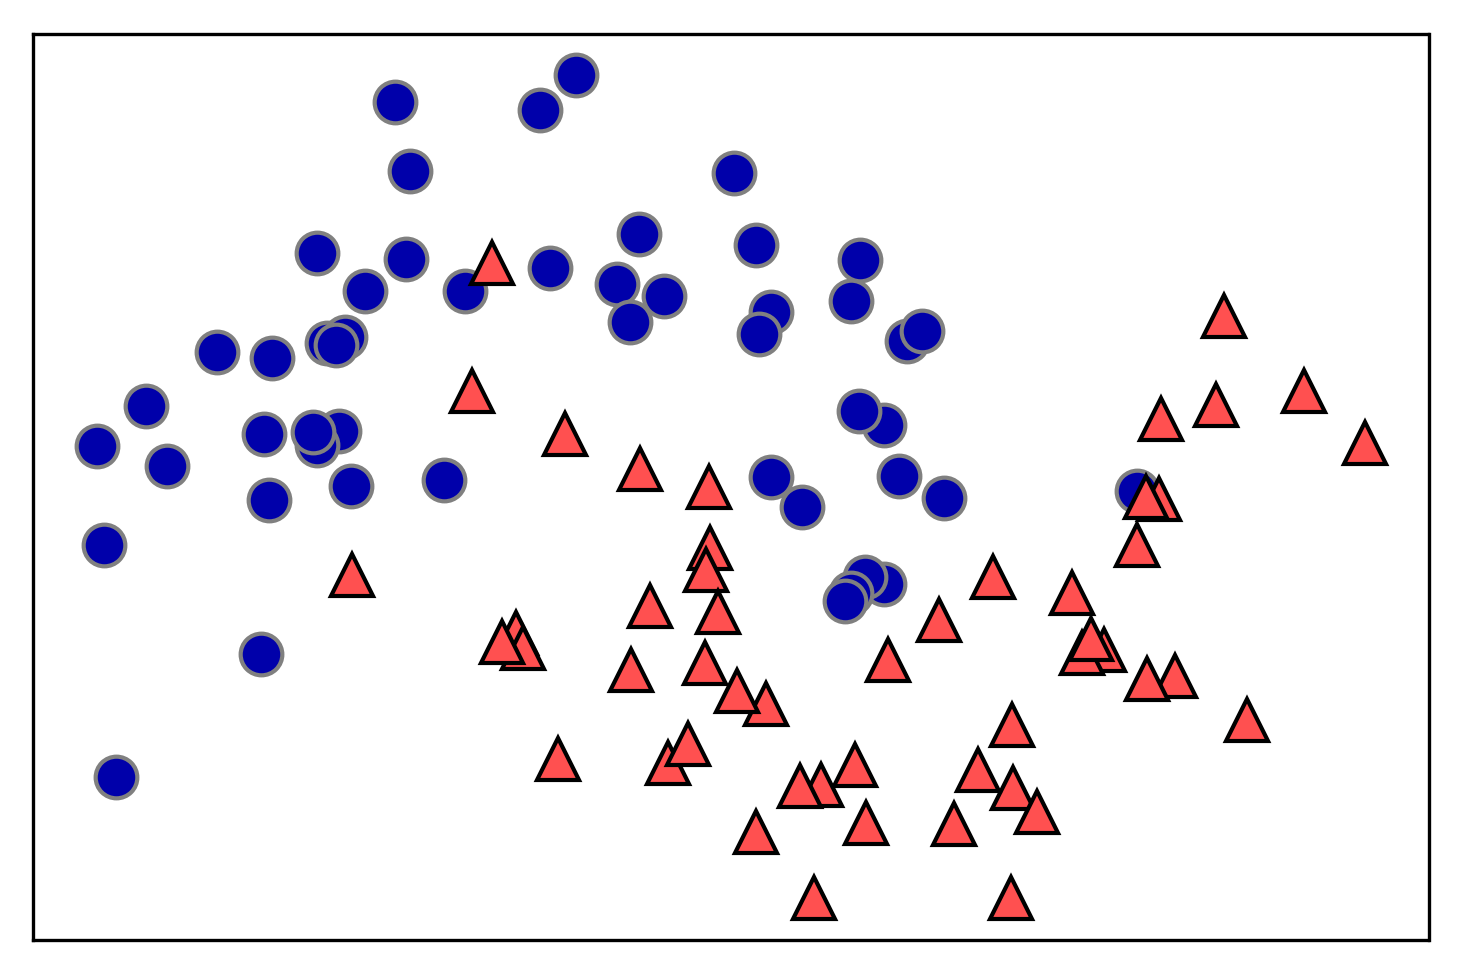

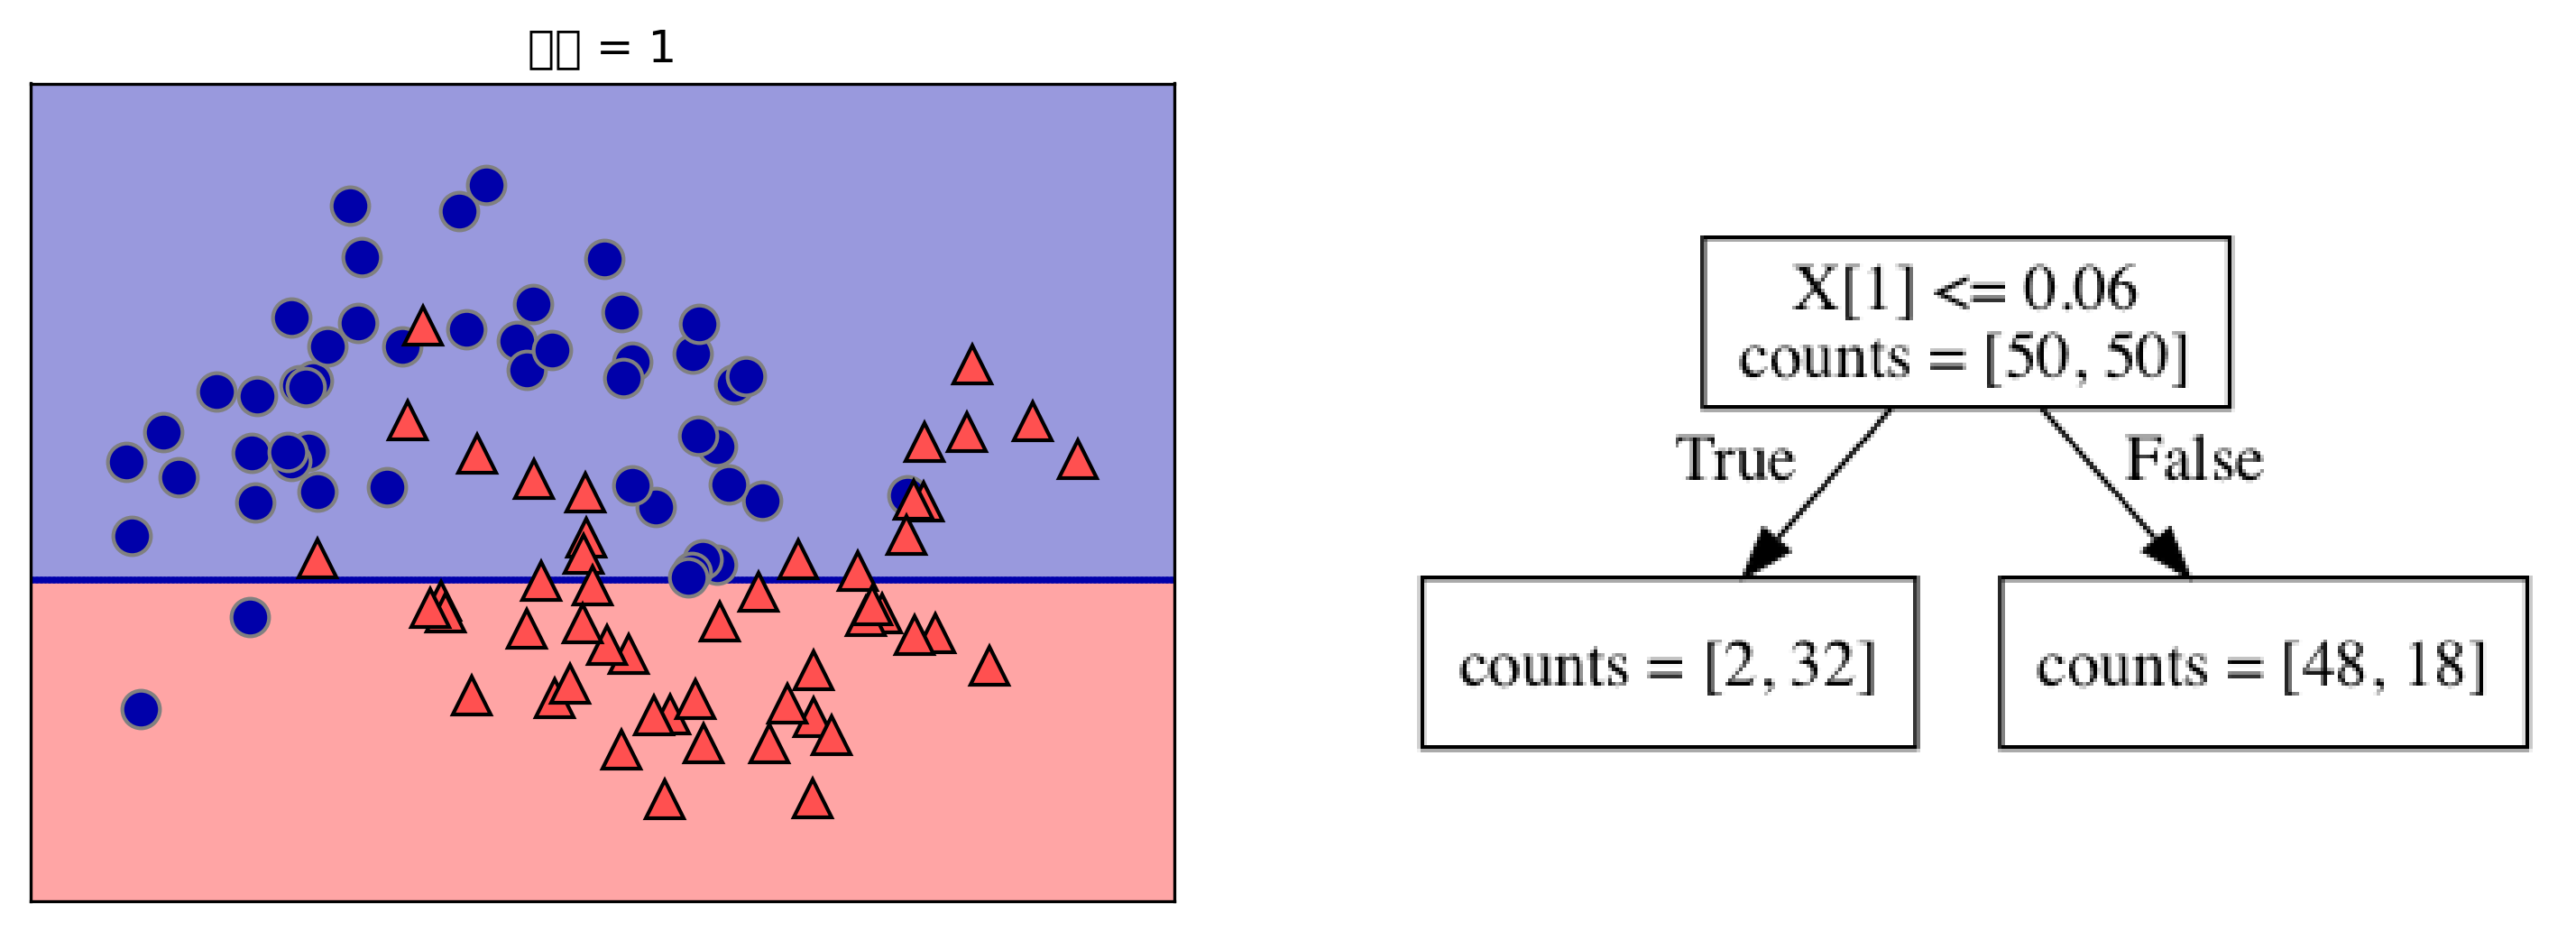

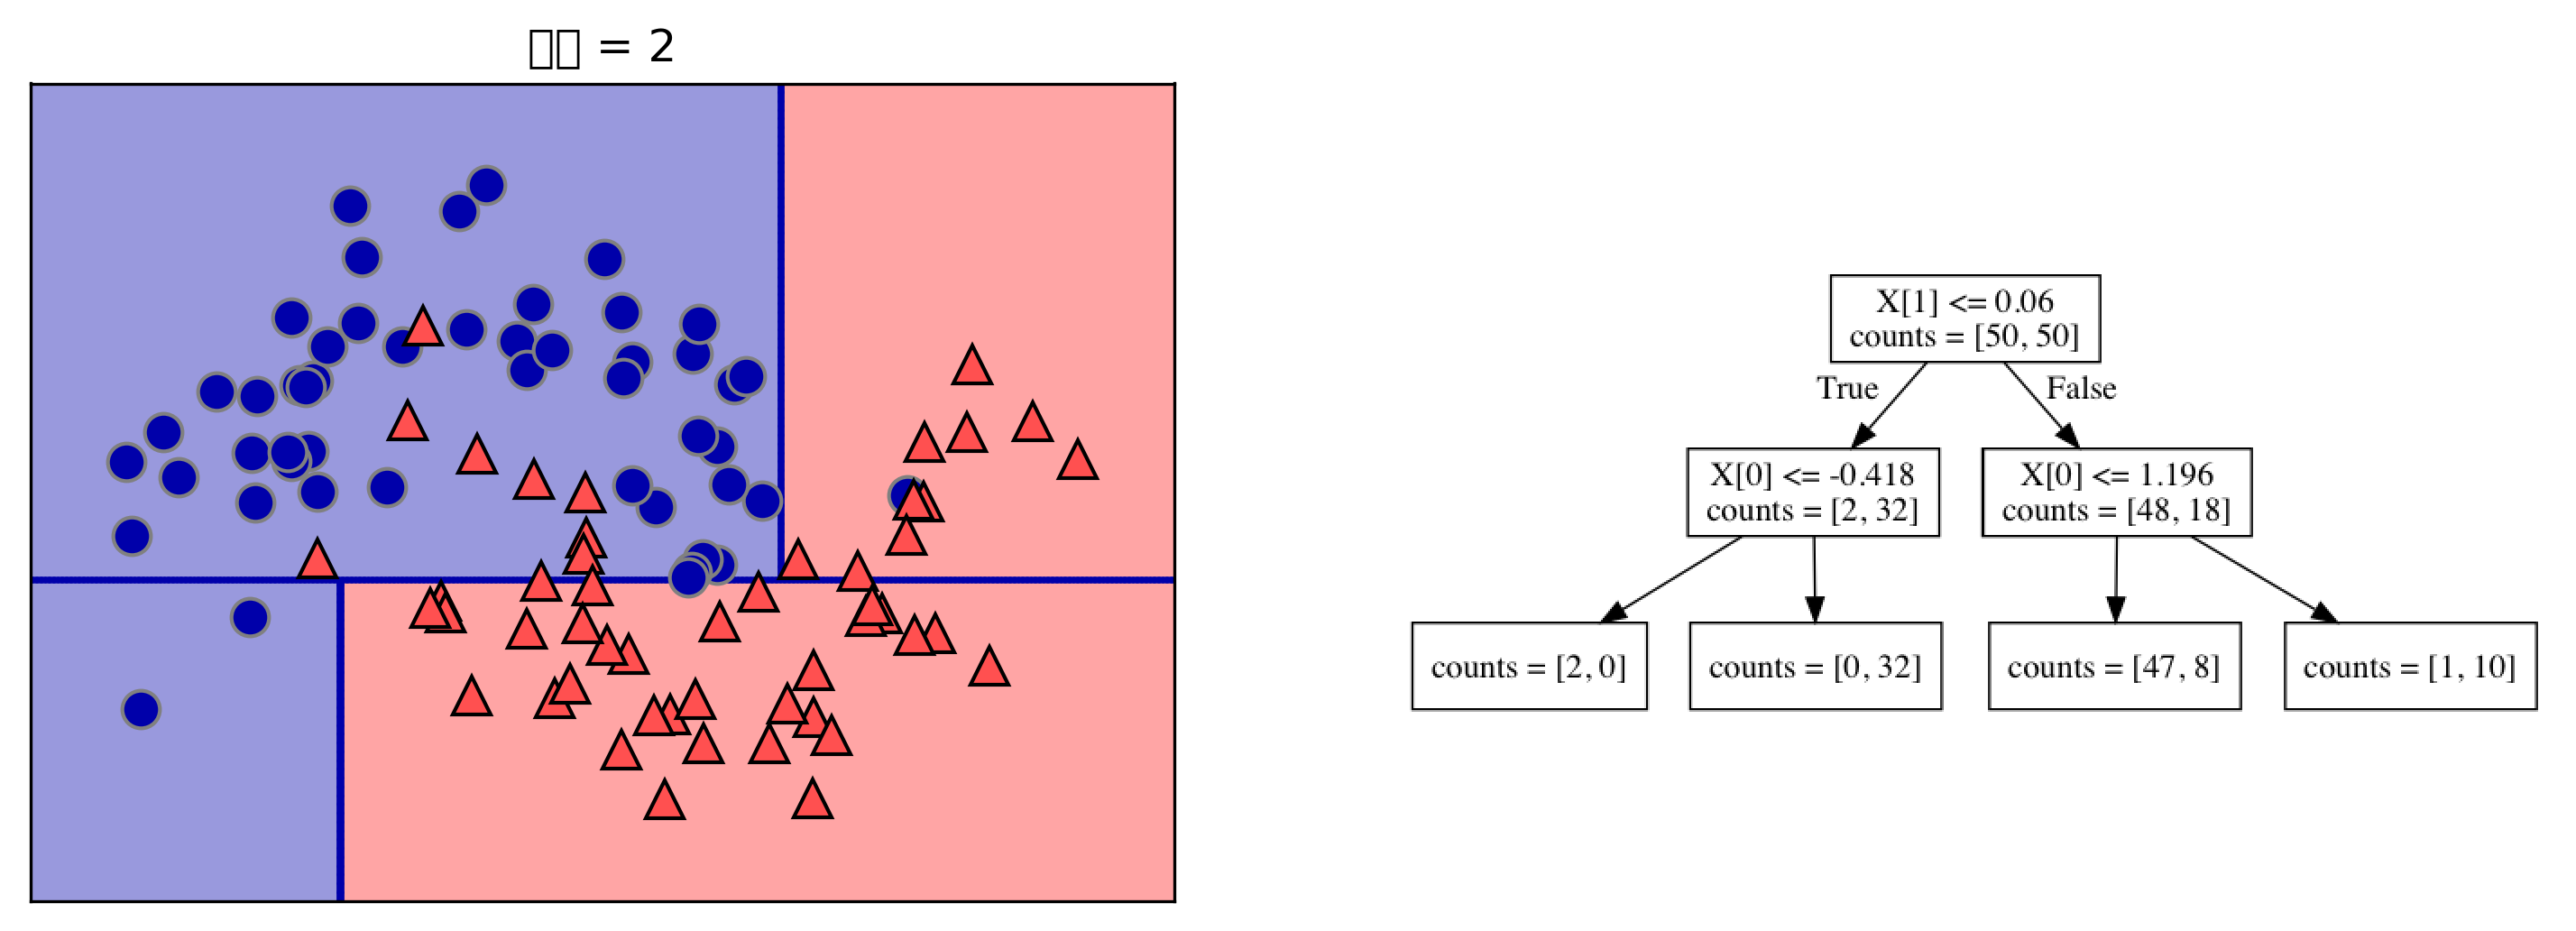

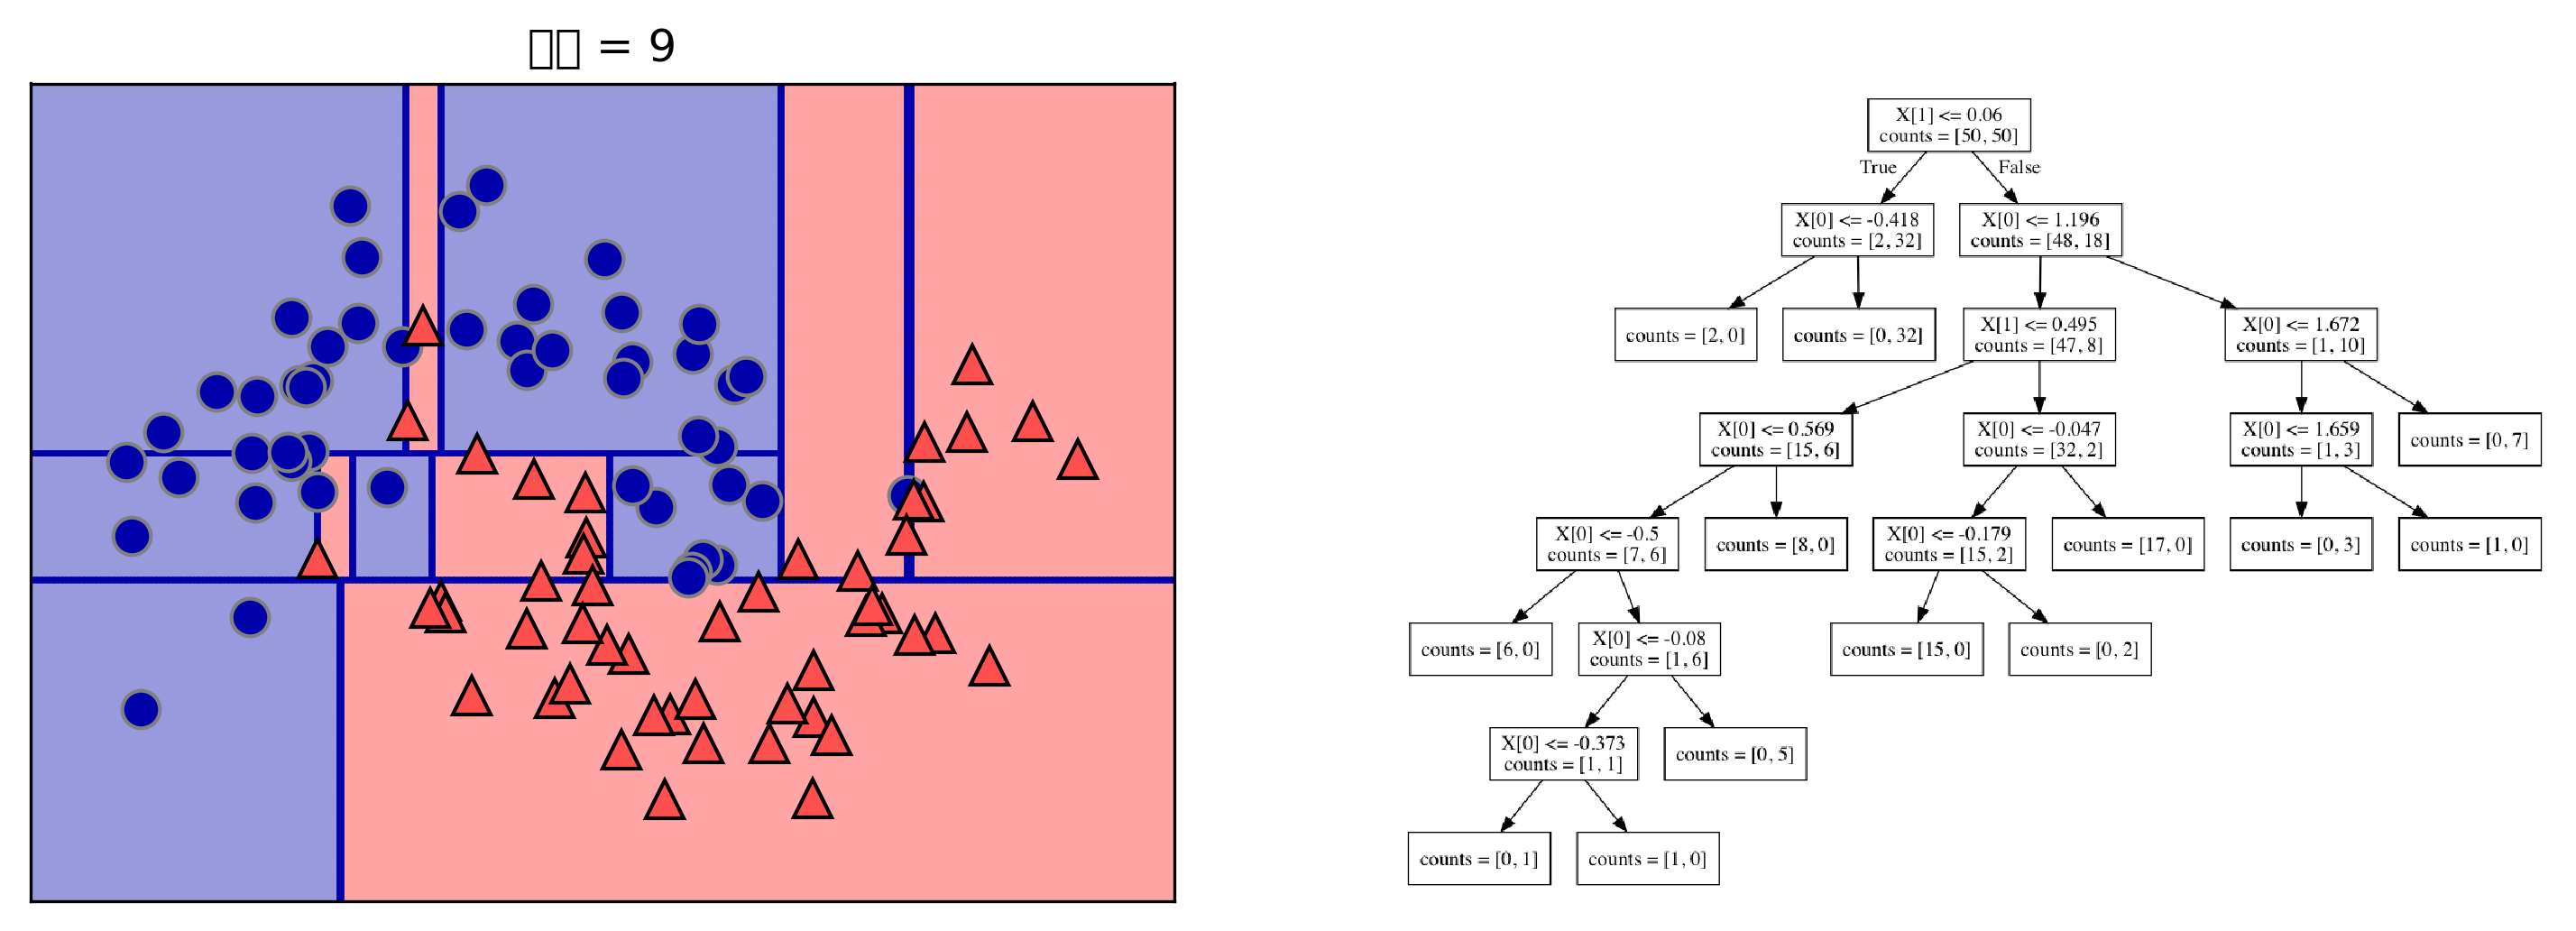

In [5]:
mglearn.plots.plot_tree_progressive()


- 위의 예에서는 한번에 하나의 특성만 조사하므로 나누는 선이 축에 수평인 것만 나타나있다
- 루트 노드: 첫번째 노드
- 순수 노드: 타깃 하나로만 이루어진 리프 노드

#### 회귀분석에 사용
- 새로운 데이터 포인트에 해당하는 리프 노드를 찾은 후, 이 노드의 훈련데의 평균 값이 이 데이터 포인트의 출력이 된다

#### 결정 트리의 복잡도(과적합) 제어
- 트리를 너무 상세하게 나누면 과적합된다. 훈련데이터에 들어 있는 이상치를 모두 찾아낸다
- 노드 생성을 미리 중단하는 사전 가지치기(pre-pruning)와 트리를 만든후에 크기가 작은 노드를 삭제하는 사후 가지치기(pruning)가 있다
- sciki-learn은 사전 가지치기만 지원한다
- 사전 가지치기에서는 트리의 최대 깊이를 제한하거나, 리프의 최대 갯수를 제한하거나, 노드가 분할하기 위한 포인트의 최소의 갯수를 지정한다 (몇 개 이하면 멈춤)

### 유방암 데이터 분석


In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


### 트리의 최대 깊이를 제한
- 깊이를 4로 제한하면 테스트데이터에 대한 성능이 향상된다

In [7]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


### 결정 트리 그래프 그리기
- 결정 트리 방식의 장점은 동작을 설명하기가 용이하다는 것

In [8]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [9]:
!pip install graphviz

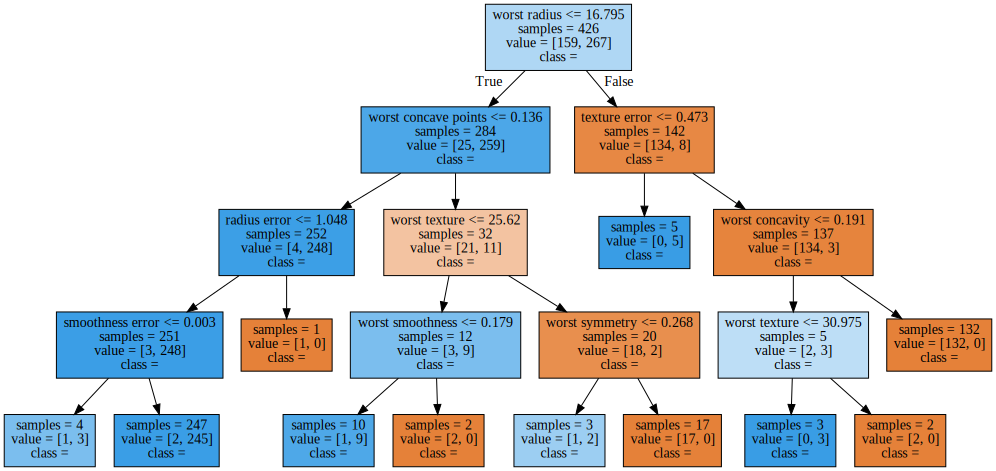

In [10]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 트리의 특성 중요도
- 트리를 만드는 과정에서 각 특성이 얼마나 기여했는지를 보는 방법이 있다
- 이를 특성중요도(feature importance)라고 하며 0~1 사이의 값을 갖는다
- 0 이면 전혀 기여하지 (사용되지) 않았다는 뜻이며 전체 특성중요도의 합은 1이 된다

In [11]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.01  0.048
 0.    0.    0.002 0.    0.    0.    0.    0.    0.727 0.046 0.    0.
 0.014 0.    0.018 0.122 0.012 0.   ]


In [12]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    
result = tree.feature_importances_
result

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.01 , 0.048, 0.   , 0.   , 0.002, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.727, 0.046, 0.   , 0.   , 0.014, 0.   , 0.018,
       0.122, 0.012, 0.   ])

/Users/hjkim/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


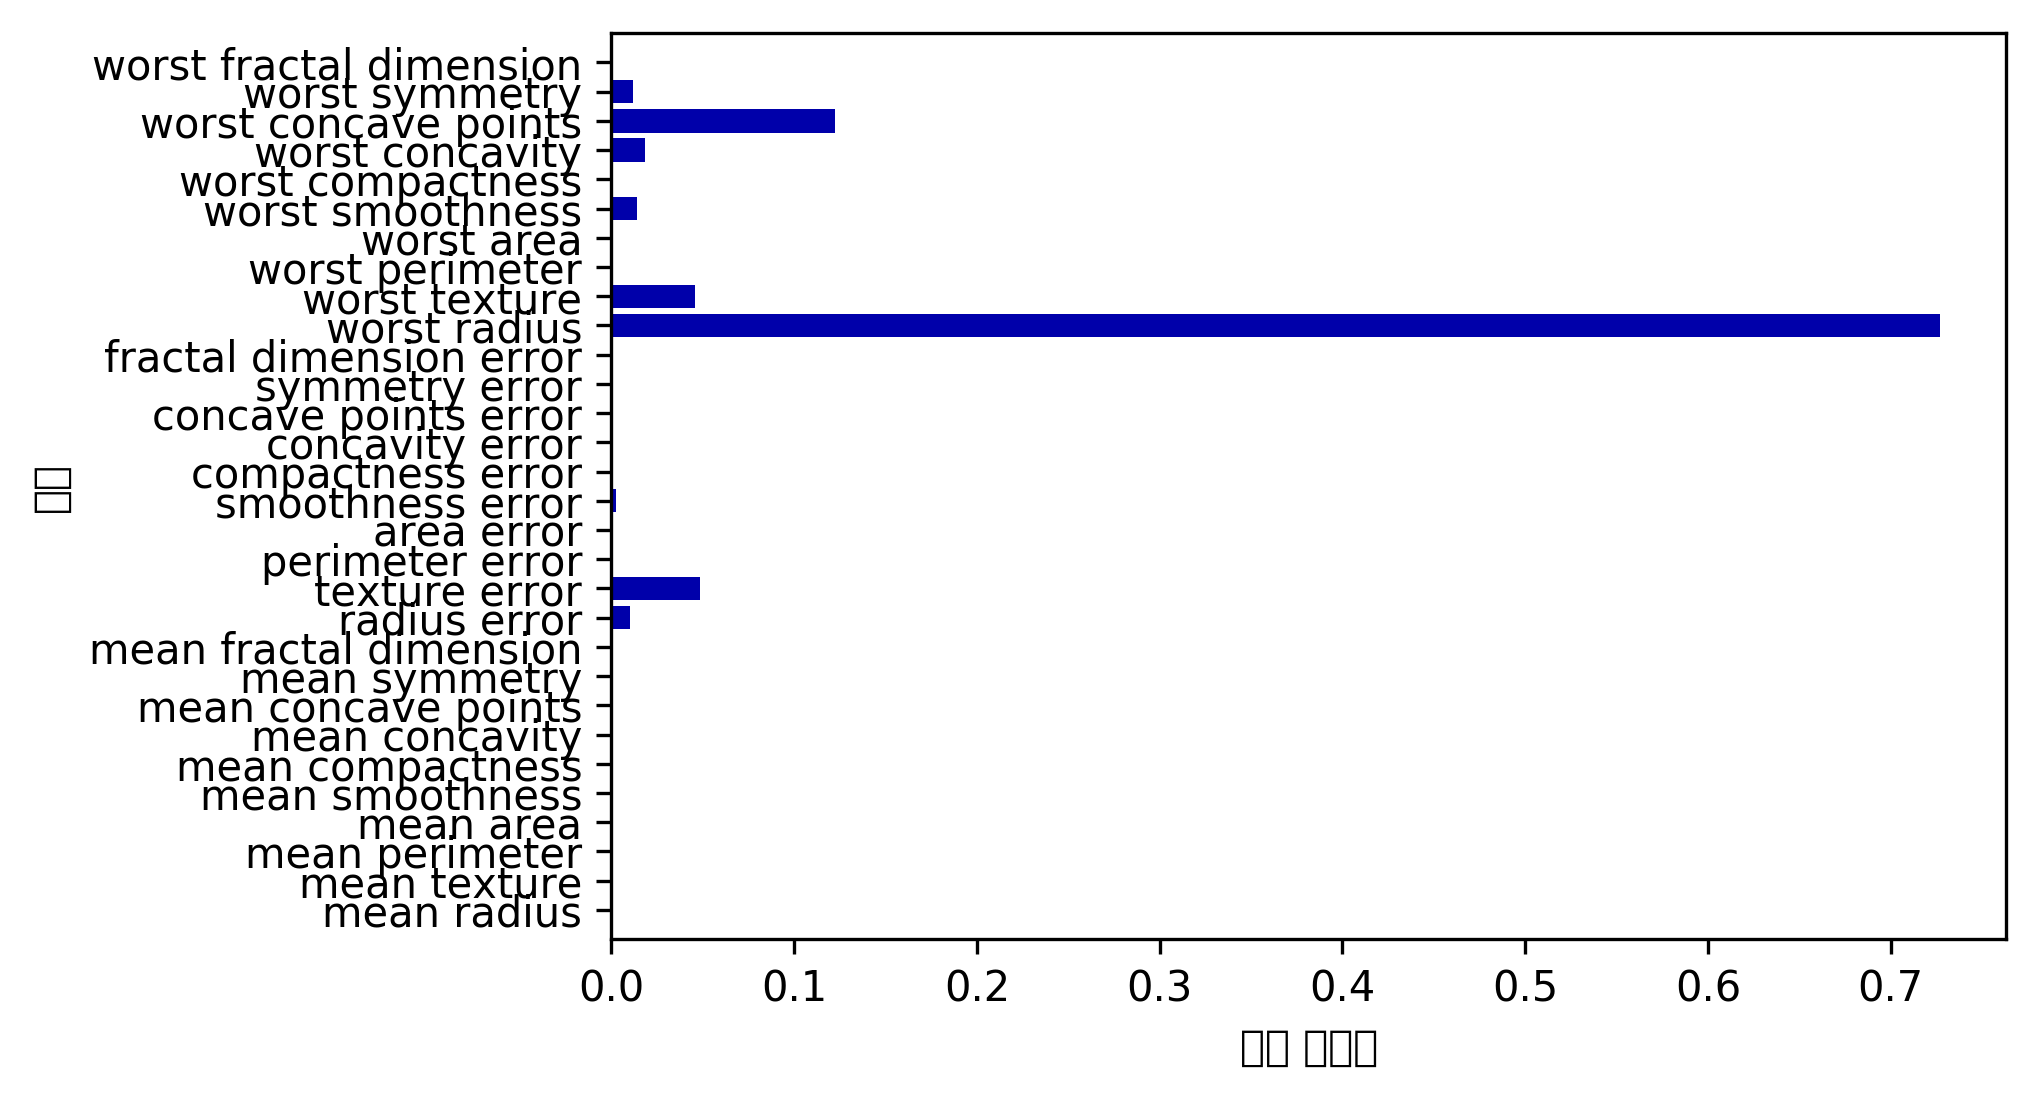

In [13]:
plot_feature_importances_cancer(tree)

In [14]:
import pandas as pd
res = pd.DataFrame(result)
res["name"] = cancer.feature_names
res

,0,name
0,0.00e+00,mean radius
1,0.00e+00,mean texture
2,0.00e+00,mean perimeter
3,0.00e+00,mean area
4,0.00e+00,mean smoothness
5,0.00e+00,mean compactness
6,0.00e+00,mean concavity
7,0.00e+00,mean concave points
8,0.00e+00,mean symmetry
9,0.00e+00,mean fractal dimension


- 위 값을 보면 worst radius의 비중이 큰 것을 알 수 있고 루트 노드에서 이 값부터 사용한 것을 알 수 있다.
- 주의할 것은 feature importance가 낮다고 하여 그 특징이 중요하지 않다는 것은 아니다. 단지 결정 트리에서 적게 사용했을 뿐이다.
- 또한 특성중요도가 양성을 지지하는지, 악성을 지지하는지도 명확하지 않다. 단지 결정트리를 만드는데 많이 기여했다는 것을 나타낼 뿐이다.

### 아래는 세 개의 단계로 구성된 샘플 데이터의 경우
- 아래의 특별한 데이터는 x[1]의 특징만 가지고 분류를 하고 있다
- 단조증가, 단조감소 하는 형태가 아니므로 특성중요도와 분류의 결과가 비례의 관계에 있다고 말 할 수 없다. 단지 중요하게 사용될 뿐이다.
- 아래에서 x[0]는 전혀 사용되지 않고 있다. (특성중요도 = 0)

Feature importances: [0. 1.]


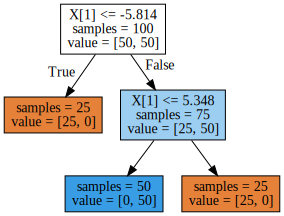

/Users/hjkim/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


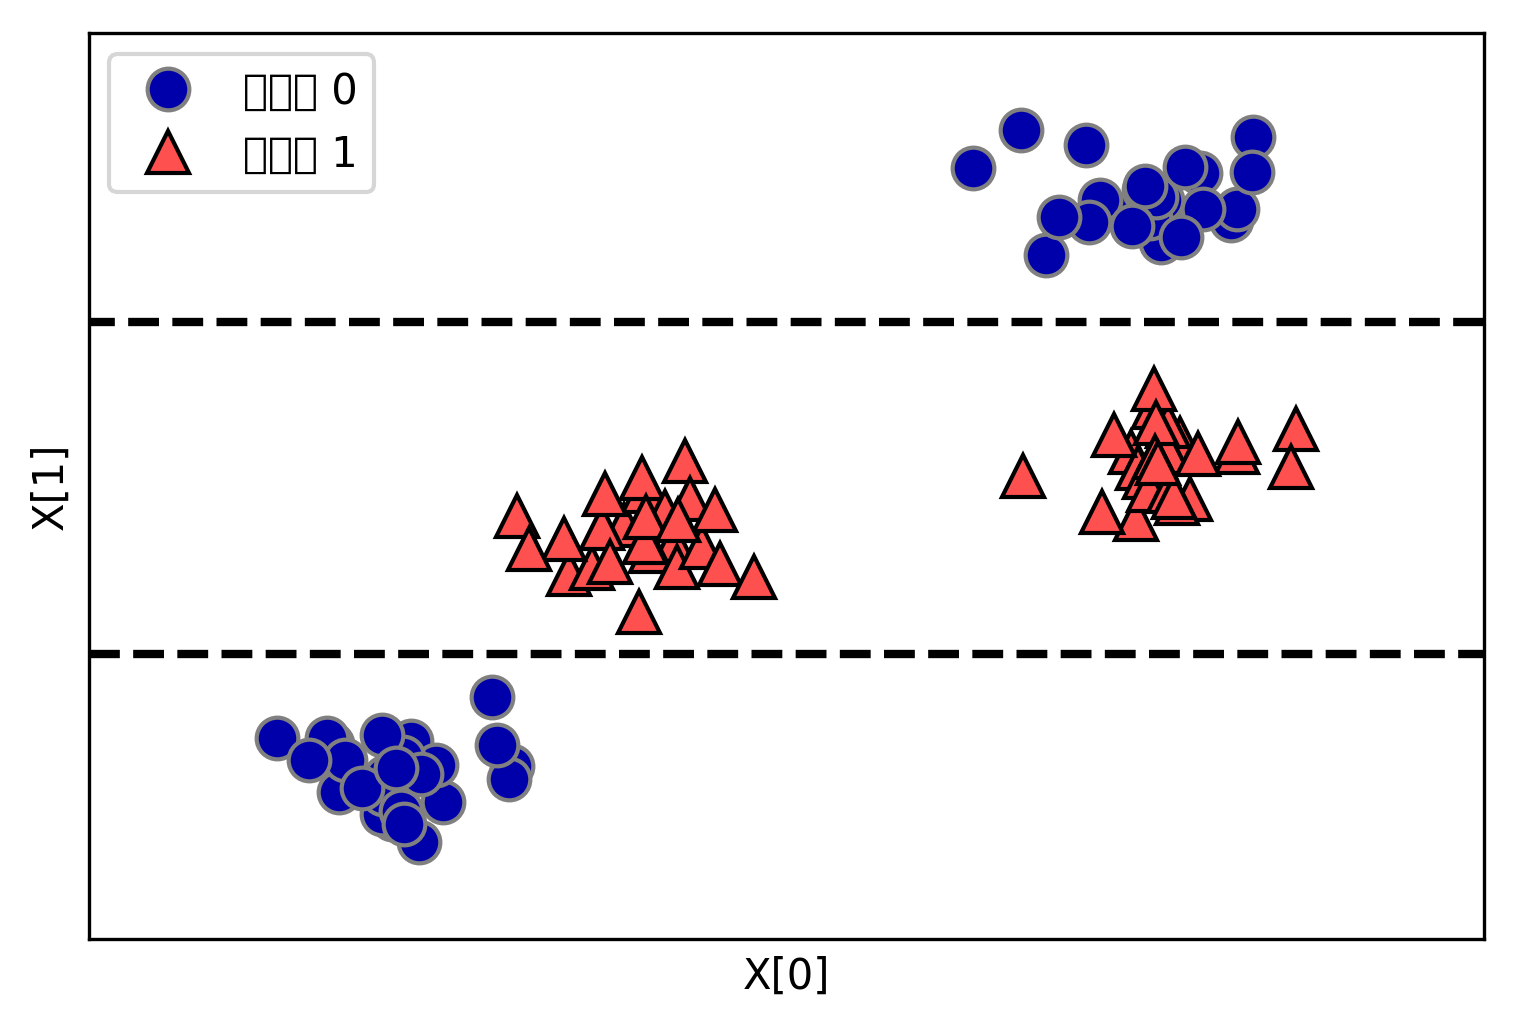

In [15]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

### 회귀분석에 활용
- 결정 트리를 회귀분석에 사용할 수 있다. 그런데 주의할 것은 훈련데이터로 주어진 샘플의 범위를 벗어나는 구간은 회귀분석을 할 수 없다 (extrapolation이 동작하지 않는다)

In [20]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

In [21]:
ram_prices

,Unnamed: 0,date,price
0,0,1957.00,4.11e+08
1,1,1959.00,6.79e+07
2,2,1960.00,5.24e+06
3,3,1965.00,2.64e+06
4,4,1970.00,7.34e+05
5,5,1973.00,3.99e+05
6,6,1974.00,3.15e+05
7,7,1975.00,4.22e+05
8,8,1975.08,1.80e+05
9,9,1975.25,6.76e+04


/Users/hjkim/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


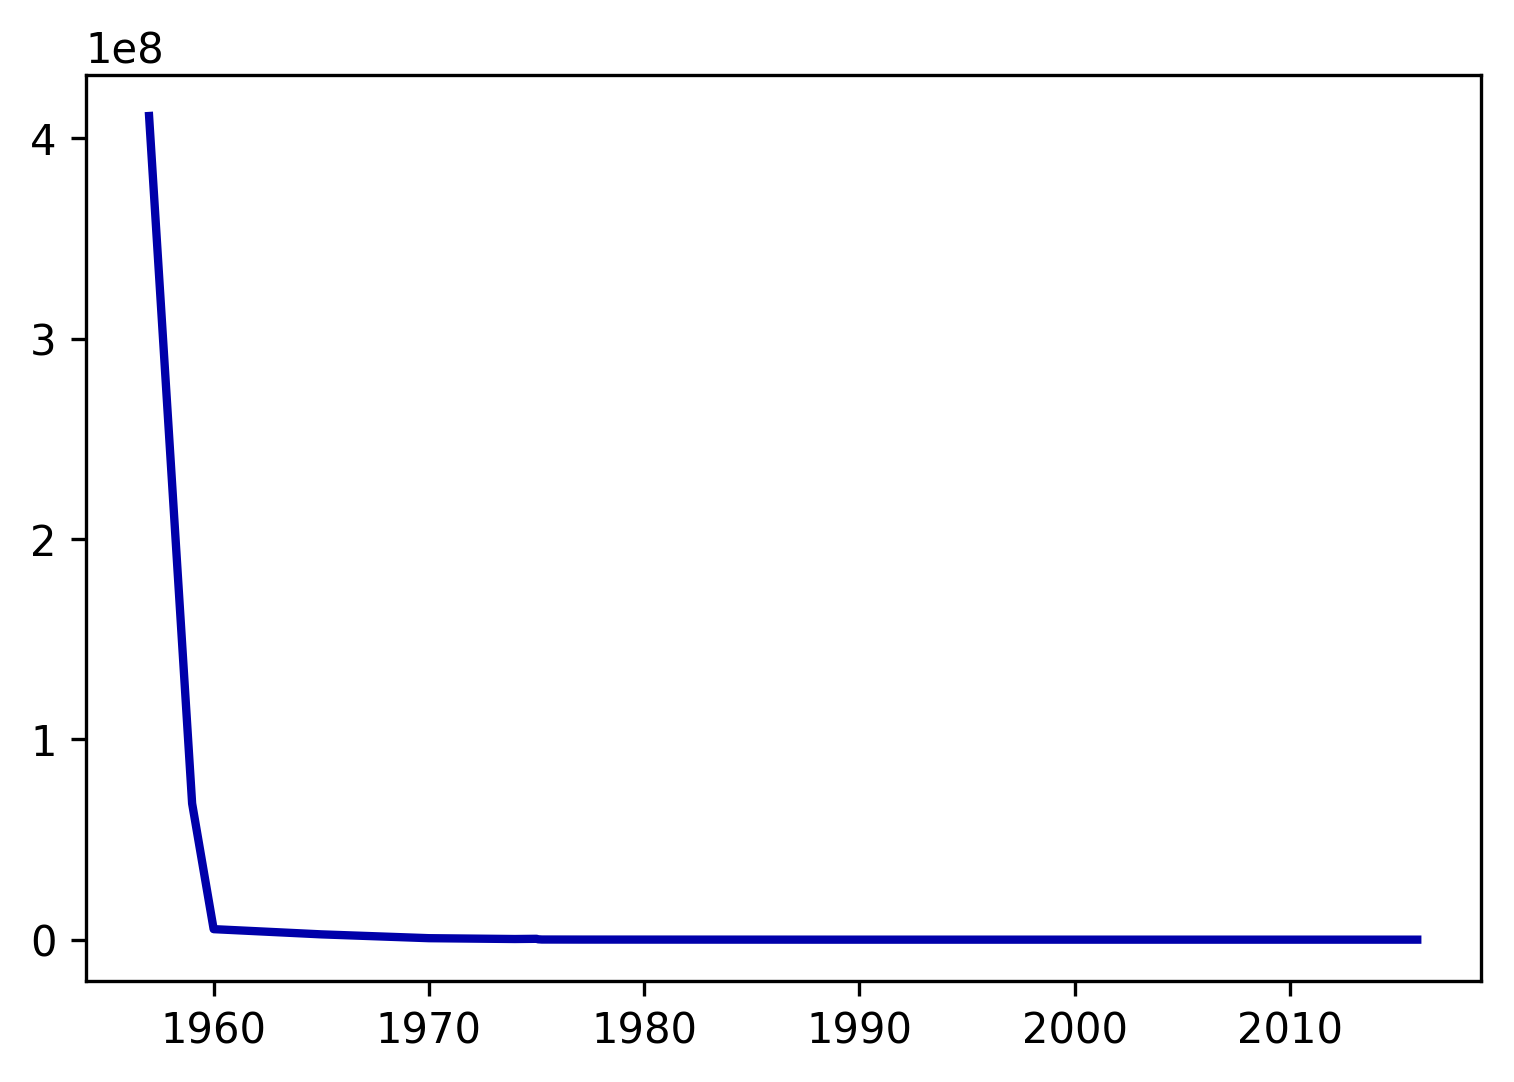

In [22]:
plt.plot(ram_prices.date, ram_prices.price)

/Users/hjkim/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


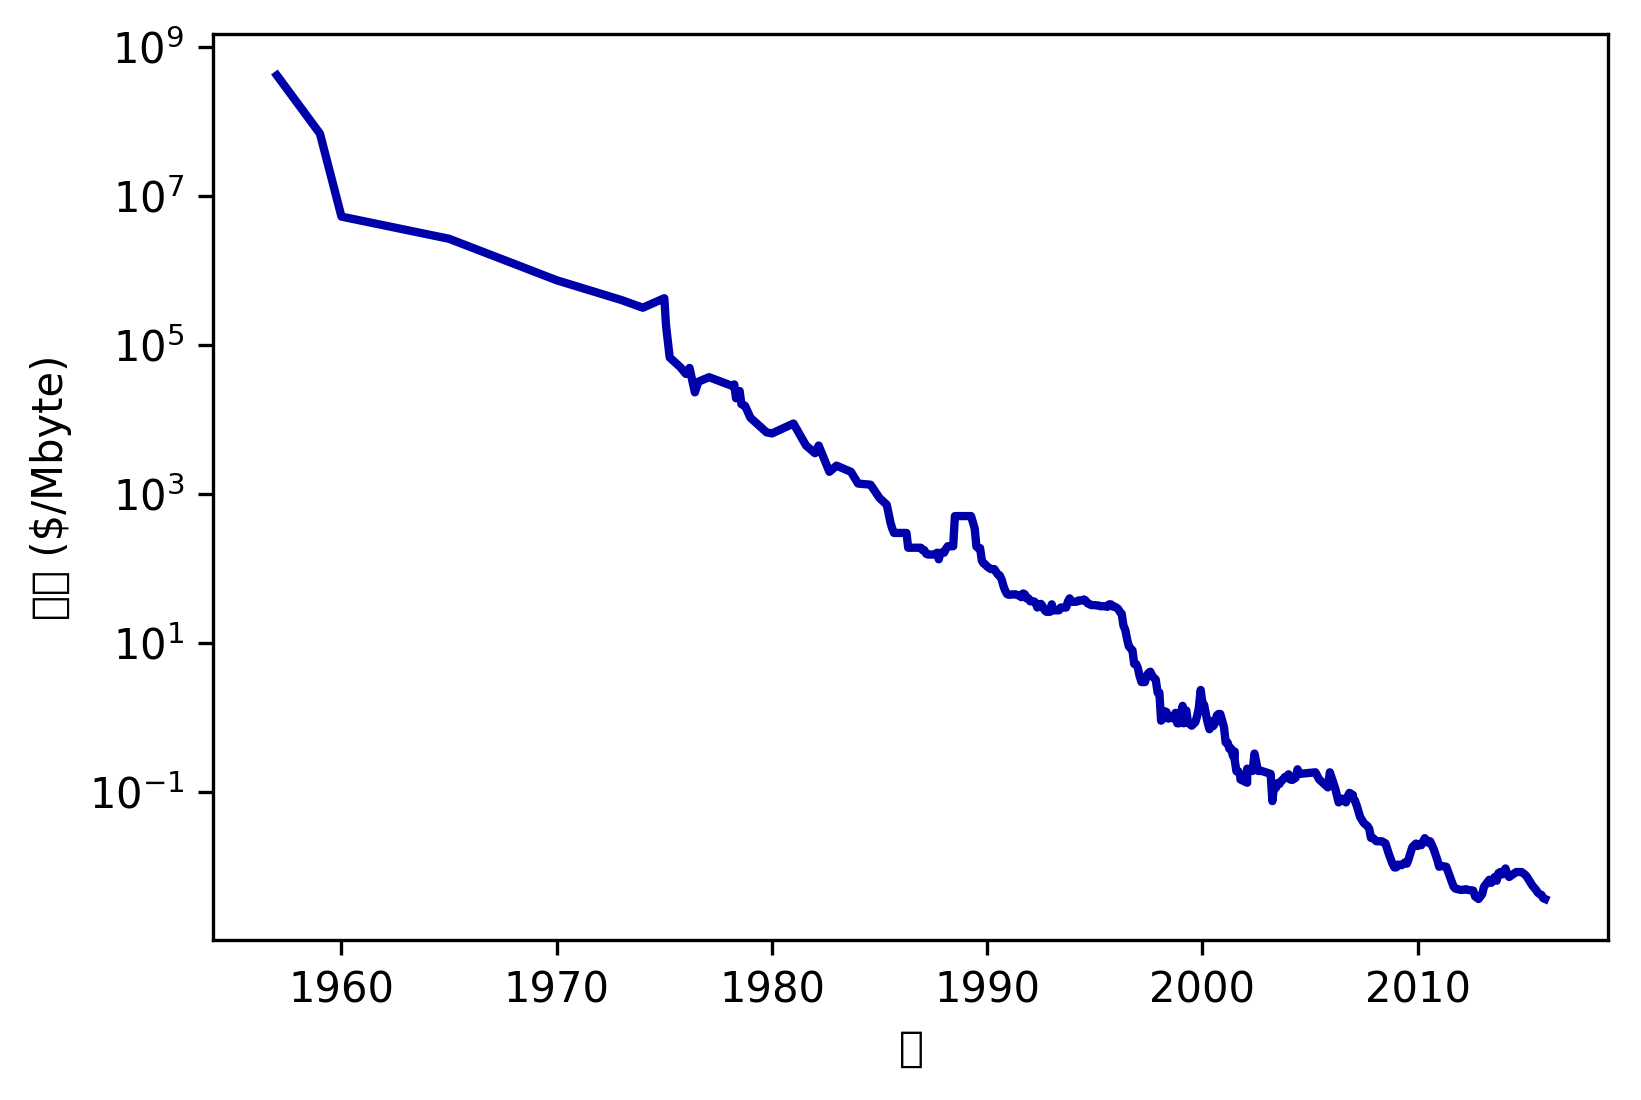

In [23]:
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

- 결정트리와 선형회귀 두가지 방법을 사용하여 회귀분석을 하겠다.
- 로그를 취한 후 대략 선형적인 형태를 가진다

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

/Users/hjkim/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


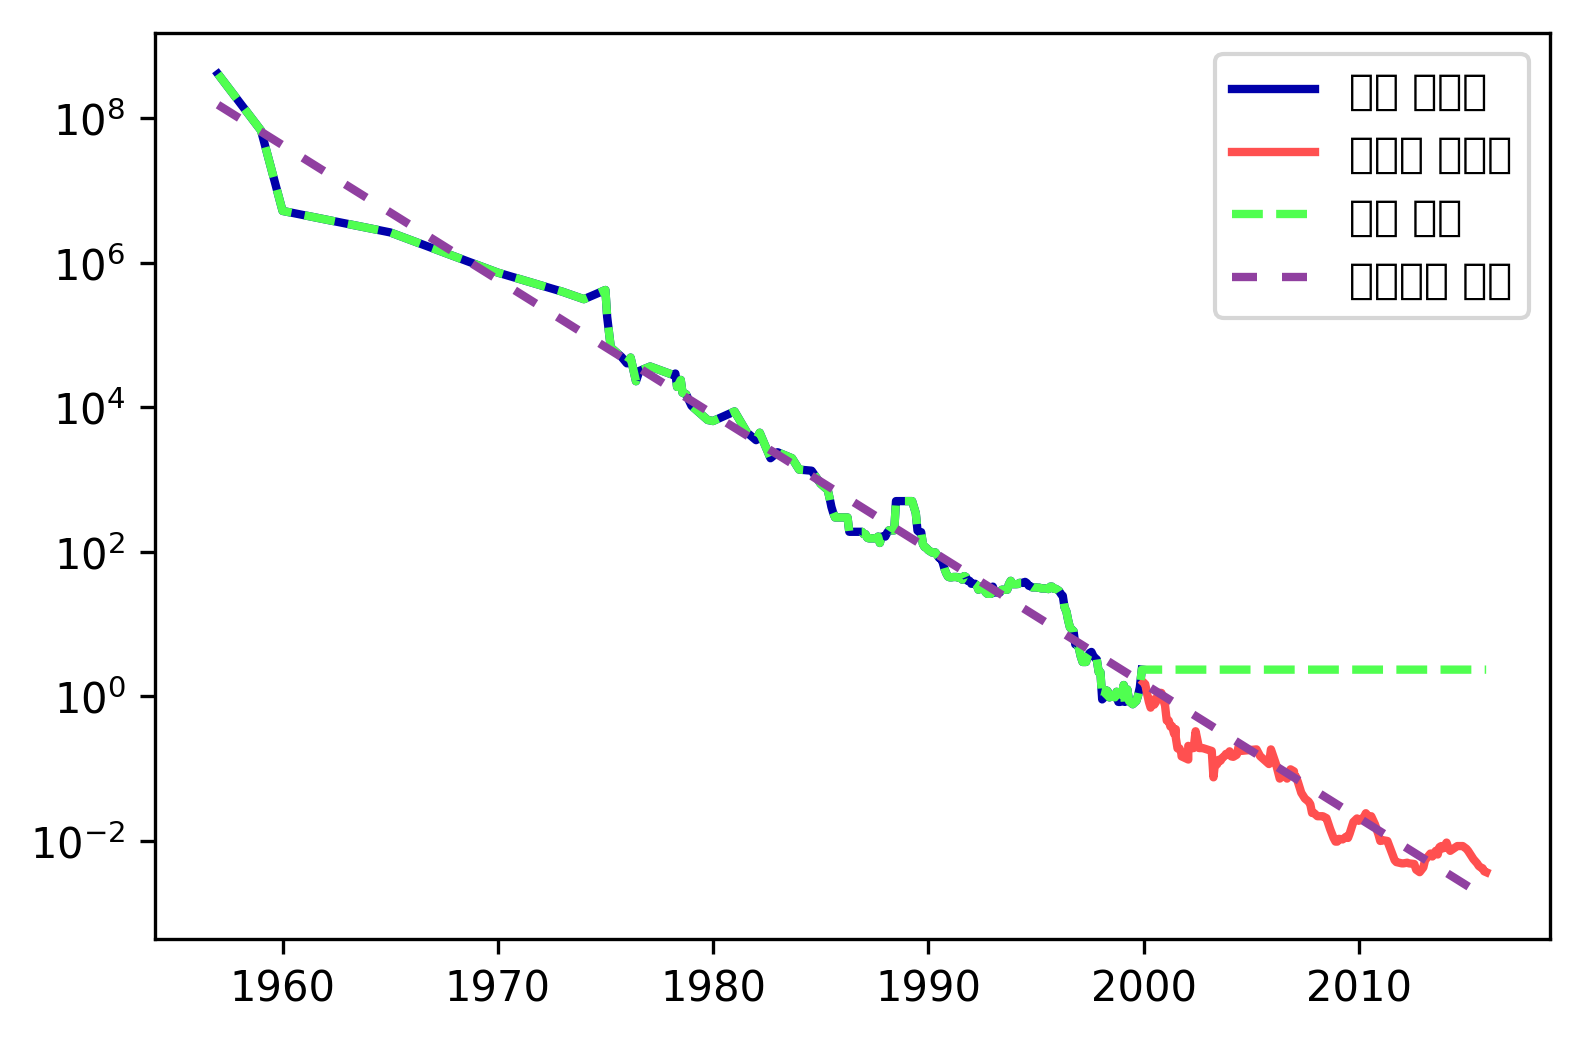

In [25]:
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()

- 트리기반 회귀분석은 매우 정확하게 훈련데이터를 사용하여 예측하는 장점이 있으나, 주어진 범위 외부에 대해서는 동작하지 않는다.
- 수학점수와 과학점수 수학이 80점이면 과학이 75점일것이다. 
- 150점만점 시험의 경우? 선형회귀는 범위 바깥에 있는것도 예측을 할수 있음
- Scaling해서 손될수 있는가?

- 선형회귀는 직선으로 동작하지만 주어진 훈련데이터 밖의 범위에 대해서도 동작한다 (확대 가능)

### 장단점과 파라미터
- 모델의 시각화가 직관적이어서 설명하기에 좋다
- 데이터의 스케일에 영향을 받지 않으므로 정규화나 전처리가 필요없다
- 특성의 종류가 이진적이거나 연속값이거나 이들이 혼합되어 있어도 잘 동작한다
- 단점은 과대적합이 되는 경향이 있다
### 이를 해결하기 위해서 앙상블 방법이 사용된다

### (참고) newaxis 사용법
- 차원을 바꾸는데(늘리는데) 사용
- reshape과 같은 기능

In [26]:
# 1D array
arr = np.array([1,2,3,4])
arr.shape

(4,)

In [27]:
arr

array([1, 2, 3, 4])

In [28]:
arr.reshape(4,1)

array([[1],
       [2],
       [3],
       [4]])

In [29]:
arr.reshape(1,4)

array([[1, 2, 3, 4]])

In [30]:
# make it as row vector by inserting an axis along first dimension
row_vec = arr[np.newaxis, :]
row_vec.shape

(1, 4)

In [31]:
row_vec

array([[1, 2, 3, 4]])

In [32]:
# make it as column vector by inserting an axis along second dimension
col_vec = arr[:, np.newaxis]
print(col_vec.shape)
col_vec

(4, 1)


array([[1],
       [2],
       [3],
       [4]])

In [33]:
col_vec.reshape(4,1,1)

array([[[1]],

       [[2]],

       [[3]],

       [[4]]])

In [34]:
col_vec = arr[:, np.newaxis, np.newaxis]
print(col_vec.shape)
col_vec

(4, 1, 1)


array([[[1]],

       [[2]],

       [[3]],

       [[4]]])

### 결정 트리의 앙상블
- 결정트리를 기반으로 하는 앙상블 알고리즘으로 랜덤 포레스트와 그래디언트 부스팅이 있다

### 랜덤 포레스트
- 결정트리의 과적합 문제를 완화
- 트리를 '랜덤하게' 여러가지로 만들고 이들의 평균을 취하는 방법
- 랜덤한 속성을 주는 방법으로, 샘플을 랜덤하게 취하거나, 특징을 랜덤하게 취한다
- 평균을 구할 전체 트리의 숫자를 정해줘야 한다 (n_estimators)
- 데이터를 랜덤하게 취하기 위해서 부트스트랩 샘플링을 한다(같은 수의 샘플을 취하되 중복 샘플링을 허용하는 방법). 샘플수가 100개면 한번도 샘플링 되지 않는 샘플수가 약 36%정도 된다.
- 몇 개의 특성을 사용할지도 지정한다(max_features)
- 특성을 선택하는 작업은 각 노드에서 반복되므로 노드마다 다른 특성을 사용하게 된다.(랜덤한 성격)
- 회귀분석을 할 때는 앙상블의 평균치를 구한다
- 분류의 경우는 확률을 고려한 약한 투표를 한다. (대표값 하나만 투표하지 않고 여러 가능성의 가중평균을 구한다)
- 남자와 여자를 구분하는법 : 100개의 트리를 만듬. 85 vs 25

### 예제
- 아래는 5개의 트리를 만드는 예 (실제는 수백개의 트리를 만든다)
- 트리 속성은 estimator_에 저장된다.
- 5개 트리 각각의 결정경계를 그렸다.(서로 모양이 많이 다르다)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

/Users/hjkim/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


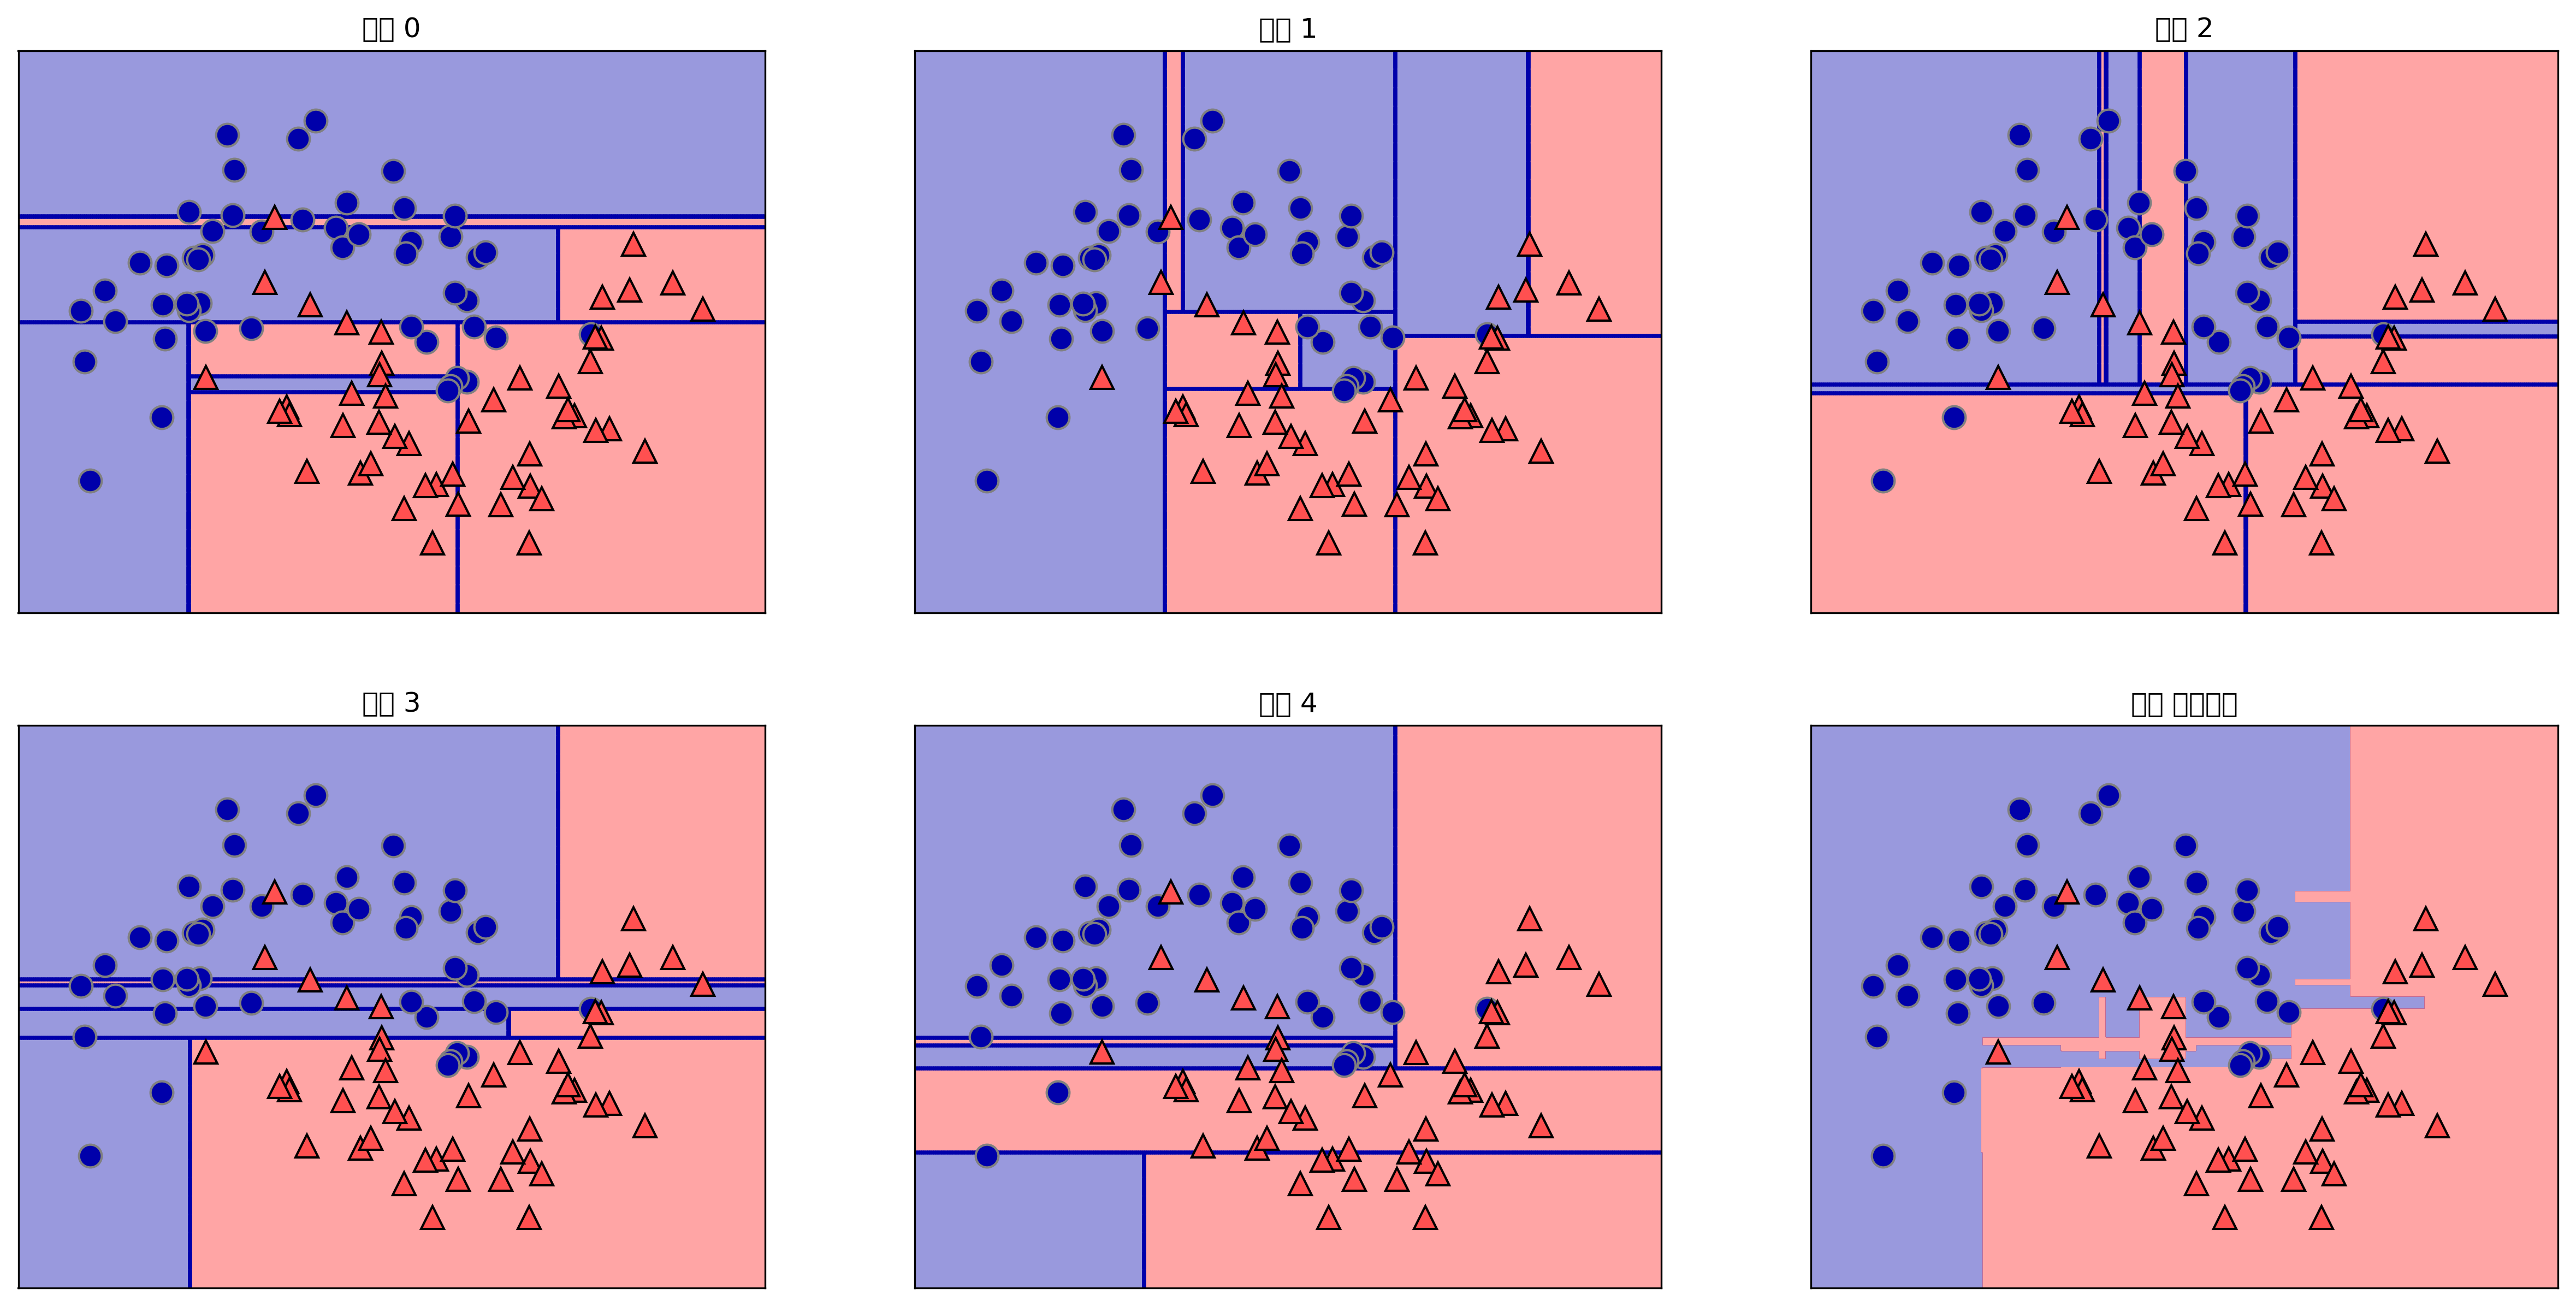

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

- 아래는 유방암 데이터의 예로 100개의 트리를 만든다
- 성능이 많이 개선되었다
- 특성중요도를 그림으로 나타냈다 (단일 트리의 경우보다 많은 특성이 사용되고 있는 것을 알 수 있다)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


/Users/hjkim/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


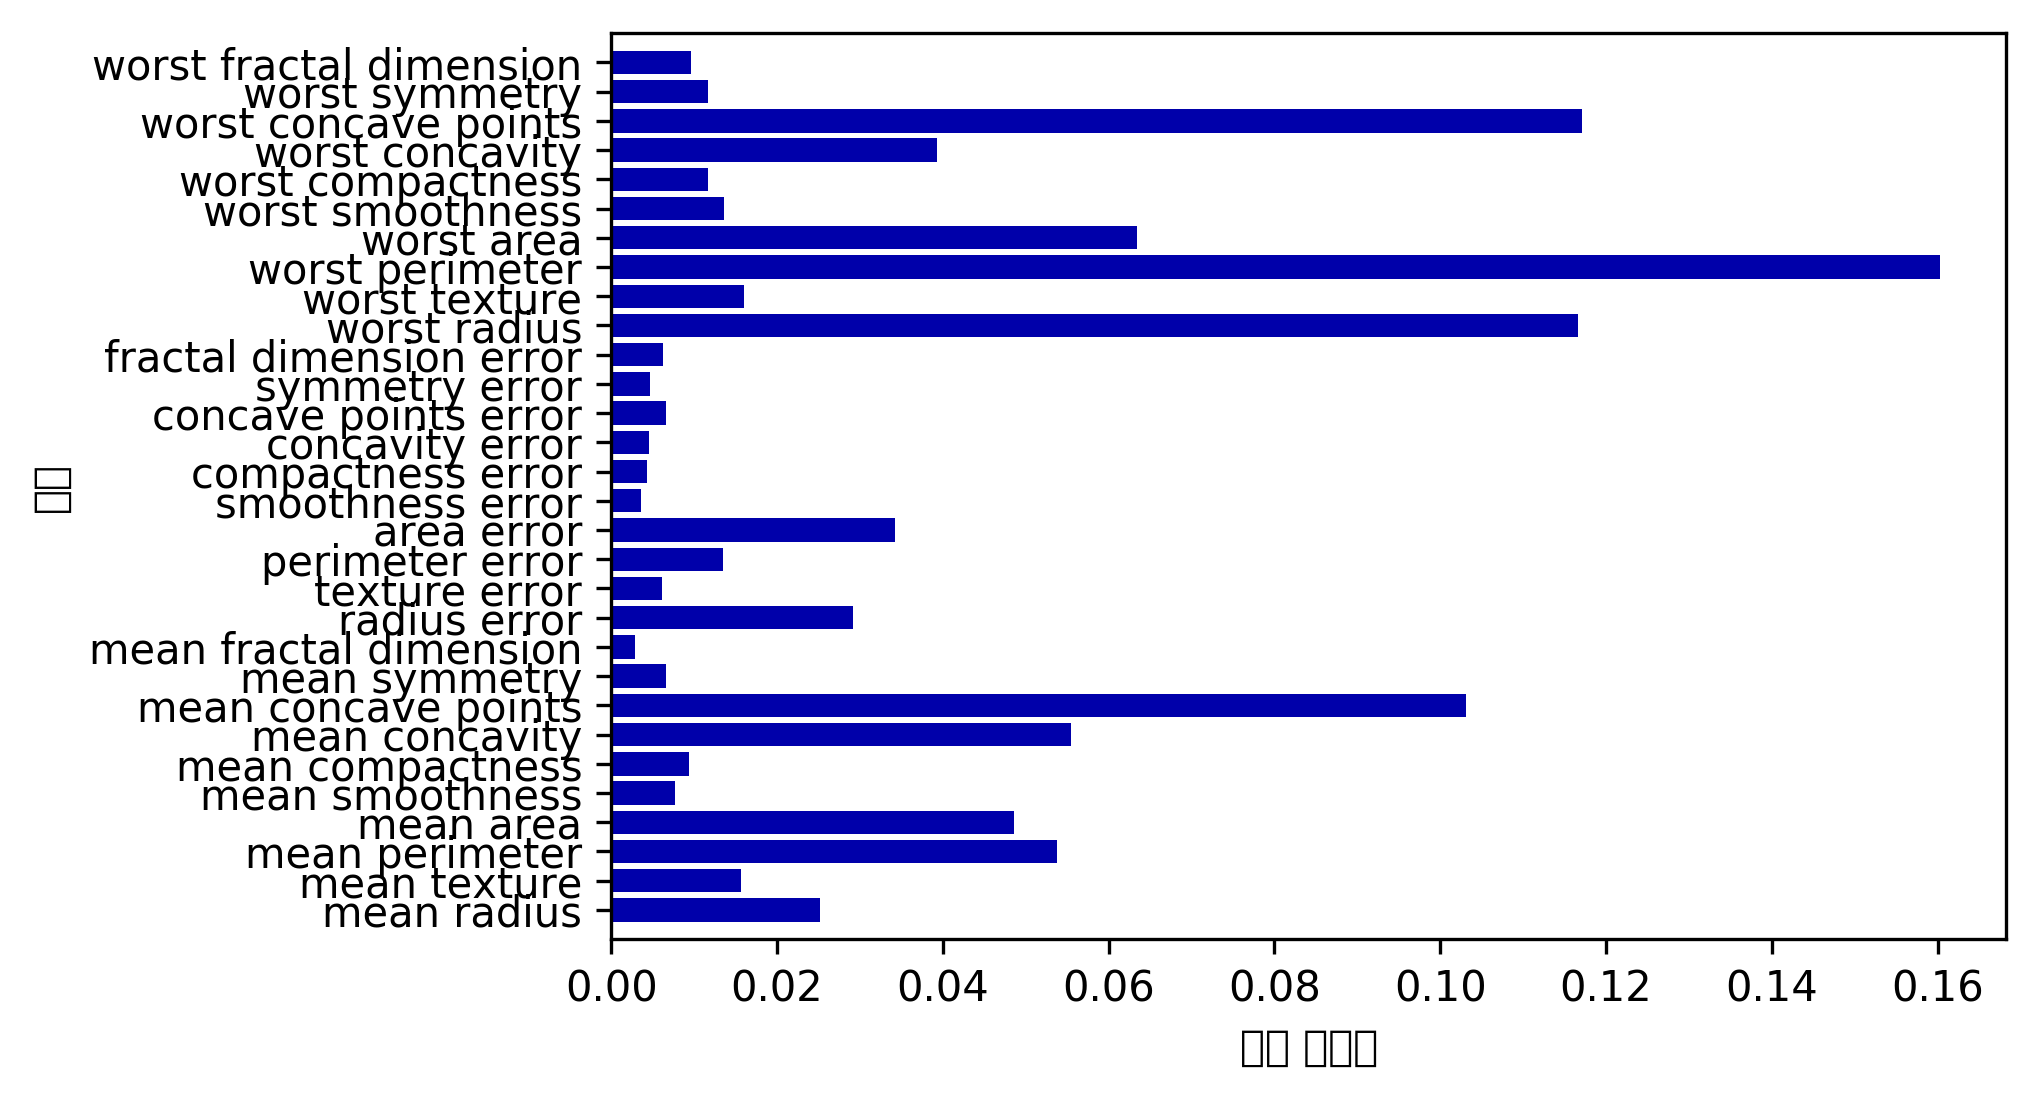

In [38]:
plot_feature_importances_cancer(forest)

### 장단점
- 스케일링을 하지 않아도 잘 동작한다.
- 여러개의 CPU에서 나누어 수행하기가 쉽다 (n_jobs=-1)
- n_estimator는 클수록 성능이 좋아진다
- 대량의 데이터에도 잘 동작한다 (훈련 시간은 오래 걸린다)
- 랜덤하므로 결과 모데리 매번 달라질 수 있다
- 텍스트 데이터처럼 차원이 높고 희소한 데이터에는 잘 동작하지 않는다 (선형모델이 더 적합)
- 기본값은 분류에서는 max_features = SQRT(n_features)이고, 회귀에서는 max_features = n_features이다. 
- max_leaf_nodes를 조절하기도 한다

### 그래디언트 부스팅 회귀 트리
- 랜덤한 방식으로 트리의 앙상블을 구하는 것이 아니라 이전의 트리의 성능을 단계적으로 보완하는 방식으로 동작. 오차를 줄이는 방향으로 트리를 추가하는 방식으로 경사하강법을 사용한다.
- 깊지 않은 트리를 사용함으로써 학습속도가 빠르다
- 학습속도(learning rate)를 미세하게 조정해주어야 한다.
- (무작위성 대신에) 사전 가지치기를 사용한다
- 가장 성능이 좋은 알고리즘으로 분류 및 예측에 모두 사용된다
#### 아래는 유방암 예측을 하는 예
- 기본값은, 트리 깊이는 3, 트리 수는 100개, 학습속도 0.01

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958


In [40]:
gbrt

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [109]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [110]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


- 아래는 깊이가 '1'인 트리를 사용하는예로, 깊이가 1이어도 잘 동작한다

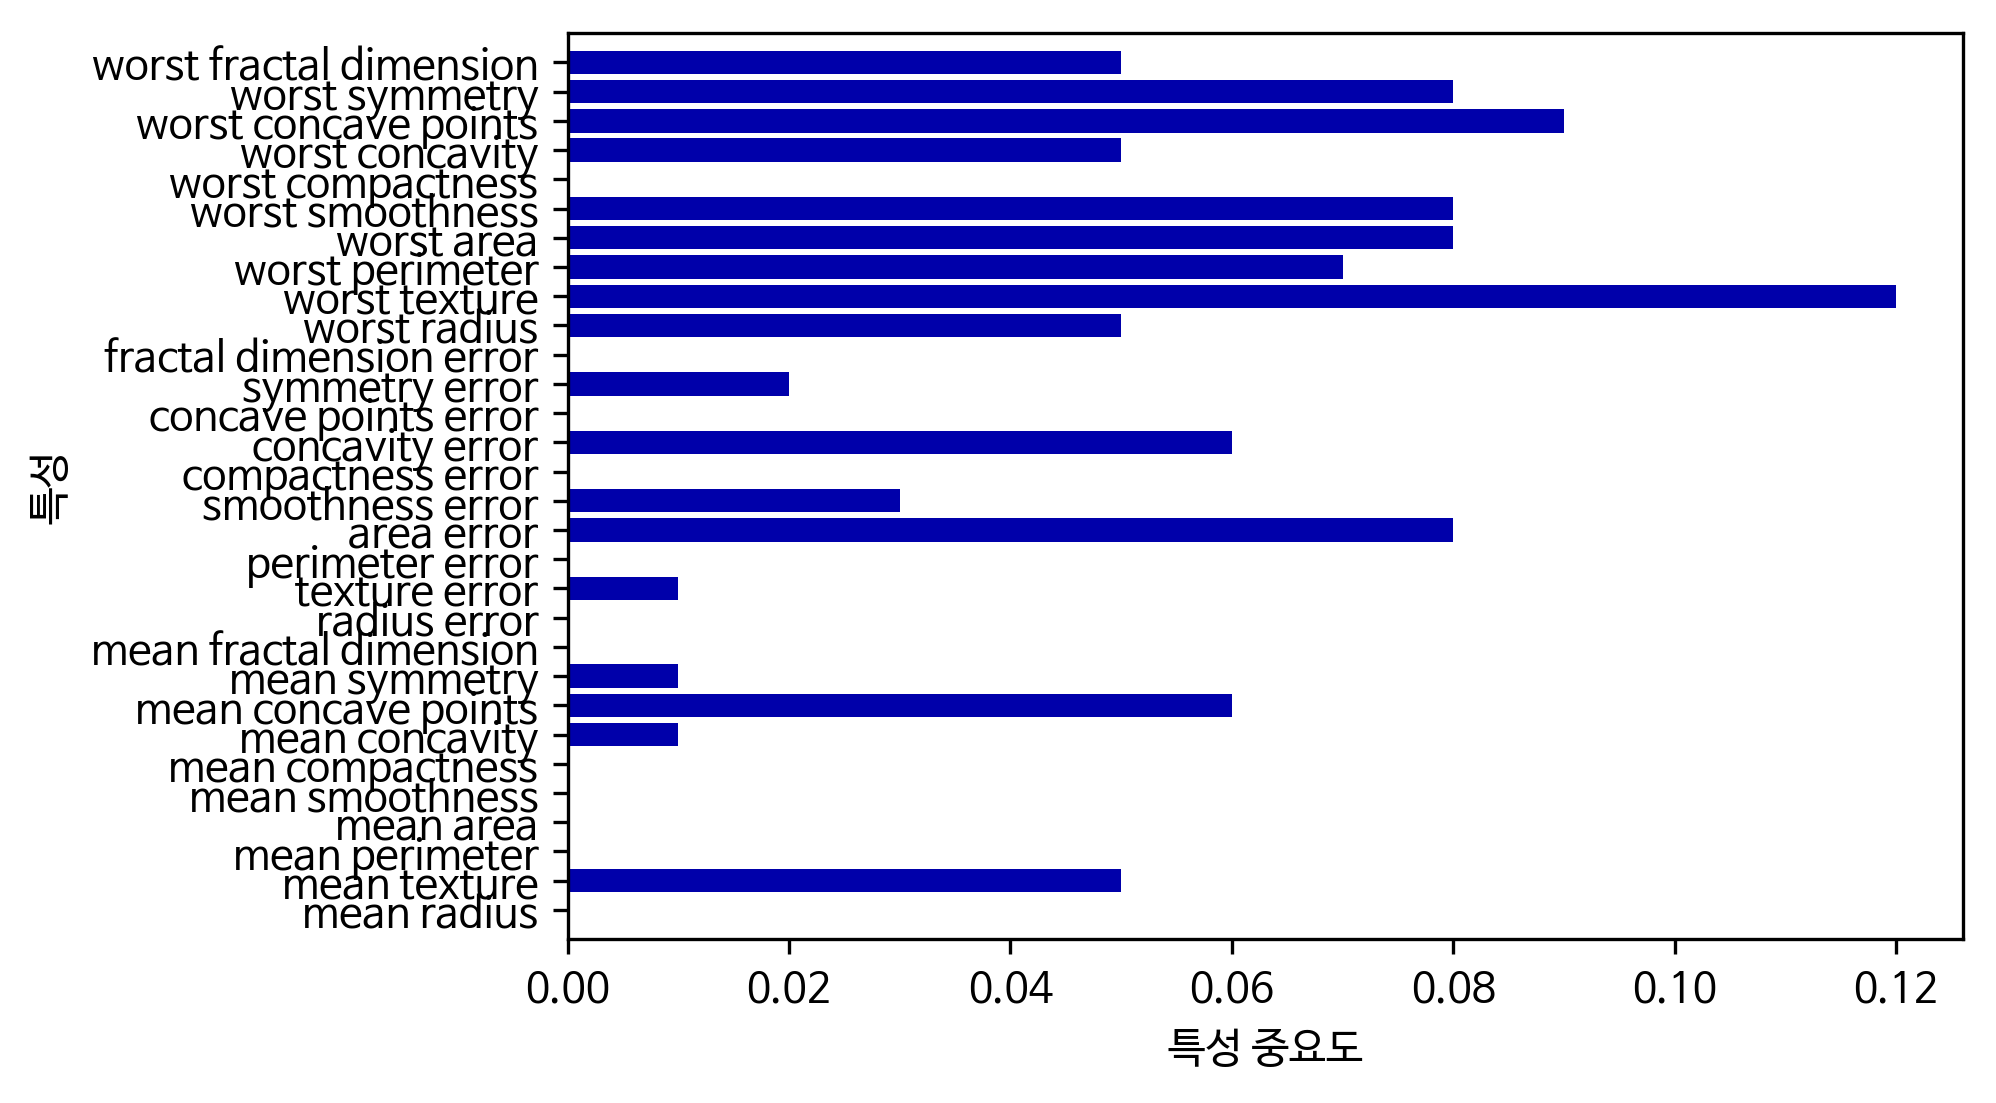

In [111]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

### 장단점
- 기본적으로는 랜덤포레스트를 사용하고, 성능 향상이 중요한 경우에는 정교하게 gb 방식을 도입한다. 성능은 비슷하다
- 희소한 고차원 데이터에 대해서는 잘 동작하지 않는다
- 학습속도를 낮추면 보통 더 많은 트리를 사용해야 한다.
- 랜덤 포레스트에서는 트리의 수가 많을수록 성능이 개선되었느나, gb에서는 과적합될 수 있다
- 먼저 가용한 자원 범위에서 트리의 수를 정하고, 학습속도를 튜닝한다.
- 트리의 깊이는 보통 5 이하를 사용한다